<a href="https://colab.research.google.com/github/ydsyvn/optimizers-from-scratch/blob/main/optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from typing import Callable
import random

# functions

In [3]:
def calc_slope(f: Callable[[float], float], p: float) -> float:
  """
  Calculates the slope of a function at a given point
  """
  h = 0.0000001
  d1 = f(p)
  d2 = f(p + h)

  return (d2 - d1) / h

In [ ]:

# gradients descent
def gd(f: Callable[[float], float], lr: float, debug: bool=False) -> float:
  """
  Finds the minima of given function using gradient descent.
  The simplest optimization algorithm.

  Args:
    f: The function we want to optimize
    lf: learning rate

  Returns:
    The minimum of the function
  """

  x = random.uniform(-10.0, 10.0)

  slope = calc_slope(f, x)

  num_steps = 0
  while not math.isclose(slope, 0.0, rel_tol=0.0, abs_tol=1e-4):
    # update rule
    slope = calc_slope(f, x) # calculate the gradient
    x -= slope * lr # update x

    num_steps += 1
    if debug and num_steps % 100 == 0:
      print(f"Step {num_steps} x: {x}, slope: {slope}")

  print(f"Reached minimum {x} after {num_steps} steps")
  return x

In [ ]:

# stochastic gradient descent
def sgd():
  pass

In [ ]:

# momentum
def momentum(f: Callable[[float], float], beta: float, lr: float, debug=False) -> float:
  """
  Finds the minima of given function using momentum.
  Improves apon simple gradient descent by keeping
    a moving average of the previous gradients and using it to

  Args:
    f: The function we want to optimize
    beta: the momentum factor (0.0 - 1.0)
    lf: learning rate

  Returns:
    The minimum of the function
  """

  x = random.uniform(-10.0, 10.0)

  slope = calc_slope(f, x)
  v = 0.0

  num_steps = 0

  while not math.isclose(slope, 0.0, rel_tol=0.0, abs_tol=1e-4):
    # update rule
    slope = calc_slope(f, x) # calculate gradient
    v = beta*v + (1 - beta)*slope # update moving average of gradients
    x -= lr*v # update x

    num_steps += 1
    if debug and num_steps % 500 == 0:
      print(f"Step {num_steps} x: {x}, velocity: {v}, slope: {slope}")

  print(f"Reached minimum {x} after {num_steps} steps")
  return x

In [ ]:
def adagrad(f: Callable[[float], float], lr: float, debug=False) -> float:
  """
  Finds the minima of given function using adagrad.
  Improves apon momentum by adapting the lr for each
      parameter based on the sum of squared gradients

  Args:
    f: The function we want to optimize
    lf: learning rate

  Returns:
    The minimum of the function
  """

  x = random.uniform(-10.0, 10.0)

  slope = calc_slope(f, x)
  # v = 0.0
  vt = 0 # squared sum of gradients

  num_steps = 0

  while not math.isclose(slope, 0.0, rel_tol=0.0, abs_tol=1e-4):
    # for _ in range(100):
    # update rule
    slope = calc_slope(f, x) # calculate gradient
    vt += slope ** 2 # update moving average of gradients
    eta = lr / ((vt  + 1e-9) ** 0.5) # adaptive learning rate
    x -= eta * slope # update x

    num_steps += 1
    if debug and num_steps % 500 == 0:
      print(f"Step {num_steps} x: {x}, slope: {slope}")

  print(f"Reached minimum {x} after {num_steps} steps")
  return x

In [4]:
def rmsprop(f: Callable[[float], float], beta: float, lr: float, debug=False) -> float:
  """
  Finds the minima of given function using adagrad.
  Improves apon momentum by adapting the lr for each
      parameter based on the sum of squared gradients

  Args:
    f: The function we want to optimize
    lf: learning rate

  Returns:
    The minimum of the function
  """

  x = random.uniform(-10.0, 10.0)

  slope = calc_slope(f, x)
  vt = 0 # squared sum of gradients
  epsilon = 1e-9

  num_steps = 0

  while not math.isclose(slope, 0.0, rel_tol=0.0, abs_tol=1e-4):
    # for _ in range(100):
    # update rule
    slope = calc_slope(f, x) # calculate gradients
    vt = beta*vt + (1 - beta)*(slope ** 2) # update sum of squared gradients
    eta = lr / ((vt ** 0.5) + epsilon) # adaptive learning rate
    x -= eta * slope # update x

    num_steps += 1
    if debug and num_steps % 500 == 0:
      print(f"Step {num_steps} x: {x}, slope: {slope}")

  print(f"Reached minimum {x} after {num_steps} steps")
  return x

In [9]:
def adam(f: Callable[[float], float], beta1: float, beta2: float, lr: float, debug=False) -> float:
  """
  Finds the minima of given function using adam.
  Improves apon momentum by adapting the lr for each
      parameter based on the sum of squared gradients

  Args:
    f: The function we want to optimize
    lf: learning rate

  Returns:
    The minimum of the function
  """

  x = random.uniform(-10.0, 10.0)

  slope = calc_slope(f, x)
  Mt = 0.0
  vt = 0.0 # squared sum of gradients
  epsilon = 1e-9

  num_steps = 0

  while not math.isclose(slope, 0.0, rel_tol=0.0, abs_tol=1e-4):
    # for _ in range(100):
    # update rule
    slope = calc_slope(f, x) # calculate gradients
    mt = beta1*Mt + (1 - beta1)*slope
    vt = beta2*vt + (1 - beta2)*(slope ** 2) # update sum of squared gradients

    mt_hat = mt / (1 - beta1)
    vt_hat = vt / (1 - beta2)
    eta = mt / ((vt ** 0.5) + epsilon) # adaptive learning rate
    x -= eta * lr # update x

    num_steps += 1
    if debug and num_steps % 500 == 0:
      print(f"Step {num_steps} x: {x}, slope: {slope}")

  print(f"Reached minimum {x} after {num_steps} steps")
  return x

# testing

In [5]:
# define a function
def f(x):
  return x**2 + 3*x - 18.0

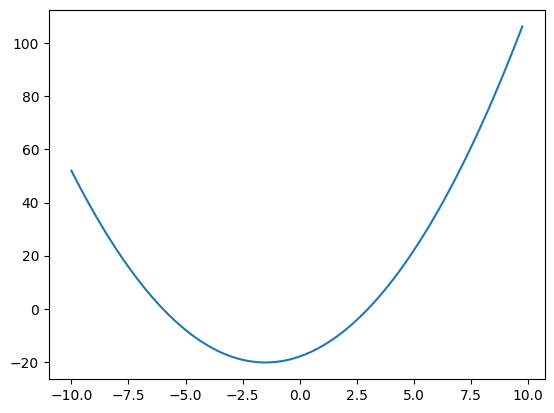

In [6]:
# plot the function
xs = np.arange(-10.0, 10.0, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [ ]:
gd_min = gd(f, lr=0.001, debug=False)

Reached minimum -0.7500249397784842 after 3200 steps


In [ ]:
momentum_min = momentum(f, beta=0.996, lr=0.001, debug=False)

Reached minimum -1.500095883520874 after 2750 steps


In [ ]:
adagrad_min = adagrad(f, lr=0.005, debug=False)

Reached minimum -1.5000500576231972 after 7099205 steps


In [8]:
rmsprop_min = rmsprop(f, beta=0.9, lr=0.01, debug=False)

Reached minimum -1.499980489449133 after 142 steps


In [10]:
adam_min = adam(f, beta1=0.9, beta2=0.9, lr=0.001, debug=True)

Step 500 x: -1.0748828352234527, slope: 0.850433998778044
Step 1000 x: -1.1247706167112073, slope: 0.7506584154270968
Step 1500 x: -1.1746424298039442, slope: 0.6509146999178483
Step 2000 x: -1.224492973135352, slope: 0.5512135103913351
Step 2500 x: -1.2743137745310267, slope: 0.4515717577646683
Step 3000 x: -1.324090021767443, slope: 0.3520190361427922
Step 3500 x: -1.3737920800285701, slope: 0.2526145337355956
Step 4000 x: -1.4233453581304192, slope: 0.15350707371908356
Step 4500 x: -1.4724339277423597, slope: 0.05532605484859232
Reached minimum -1.4999623971427893 after 4821 steps
